# Urban Planning and Sustainability

The aim of this project is to build a model that will classifiy the posts retreived from two reddits forums  into their respective forums. Those forums are the urban planning forum  and Sustainability forum.



As the world is developing  , where the population , the infrastructures are increasing , we are looking on new ways and better ways to improve our quality of life .There is a need to improve it  socially, economically and in regards of the environment.

This project is presented to the city officials and urban planners who are looking for a way to improve the sustainability of the cities.

Sustainability need to be a great key for a good urban plan.


## Problem statement
This project is aiming to help urban planners design and plan not only for this generation but also for the future  by understanding the area that need to be more focused on in order to achieve sustainability.

### Data collection 

In [1]:
import requests
import pandas as pd
import numpy as np
import time
import seaborn as sns 
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB


In [92]:
from sklearn.naive_bayes import BernoulliNB

In [2]:
url = 'https://api.pushshift.io//reddit/search/submission'

In [3]:
params1 = {
    'subreddit':'urbandesign',
    'size': 100,
    'before':1633175578
}

In [4]:
#url for the data
url = 'https://api.pushshift.io//reddit/search/submission'
#parameters for the APi
params = {
    'subreddit':'urbandesign',
    'size':100,
    'is_self':True
   
}
data_ud = pd.DataFrame()

for i in range(10):
    try:
        #get the data from the url 
        res = requests.get(url,params)
        #creating a list of dictionary which represent a post 
        urban_design = res.json()['data']
        # creating a dataframe from  the urban design 
        df1 = pd.DataFrame(urban_design)

        #updating the parameters to have the oldest time for the post
        params['before'] = min(df1['created_utc'])
        #append the dataframe
        data_ud = data_ud.append(df1,ignore_index=True)
        print( f" for {i} data shape is {data_ud.shape}")
        #adding sleep function
        if i%3 == 0:
            time.sleep(2)
    except:
        pass




 for 0 data shape is (100, 66)
 for 1 data shape is (200, 68)
 for 2 data shape is (300, 80)
 for 3 data shape is (400, 85)
 for 4 data shape is (450, 87)


In [4]:
pd.set_option('display.max_columns', None)

In [6]:
data_ud.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,post_hint,preview,pwls,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls,removed_by_category,media_metadata,poll_data,thumbnail_height,thumbnail_width,author_flair_background_color,author_flair_text_color,edited,steward_reports,updated_utc,author_created_utc,author_flair_template_id,category,content_categories,gilded,media_embed,removal_reason,secure_media_embed,suggested_sort,rte_mode,brand_safe,author_cakeday,approved_at_utc,banned_at_utc,mod_reports,user_reports
0,[],False,Oleks_DT,None,[],None,text,t2_bx1aofof,False,False,False,[],False,False,1636654022,self.urbandesign,https://www.reddit.com/r/urbandesign/comments/...,{},qrr5ah,False,True,False,False,False,True,True,False,,[],dark,text,False,False,True,0,0.0,False,all_ads,/r/urbandesign/comments/qrr5ah/topdown_and_bot...,False,self,"{'enabled': False, 'images': [{'id': 'UxMarmvk...",6.0,1.636654e+09,1,[https://youtu.be/rp4kiddWTm4](https://youtu.b...,True,False,False,urbandesign,t5_2r0d5,202916.0,public,self,TOP-DOWN and BOTTOM-UP urban development.,0.0,[],1.0,https://www.reddit.com/r/urbandesign/comments/...,all_ads,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,LL-Reddit,None,[],None,text,t2_g3s4xhpg,False,False,False,[],False,False,1636423155,self.urbandesign,https://www.reddit.com/r/urbandesign/comments/...,{},qpt335,False,False,False,False,False,False,True,False,,[],dark,text,False,False,True,0,0.0,False,all_ads,/r/urbandesign/comments/qpt335/hi_guys_plz_hel...,False,self,"{'enabled': False, 'images': [{'id': 'CMtvGTIg...",6.0,1.636423e+09,1,[removed],True,False,False,urbandesign,t5_2r0d5,202370.0,public,self,"Hi guys, plz help me with the survey of my sch...",0.0,[],1.0,https://www.reddit.com/r/urbandesign/comments/...,all_ads,6.0,reddit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,SweetZoJe,None,[],None,text,t2_lbcay,False,False,False,[],False,False,1636109918,self.urbandesign,https://www.reddit.com/r/urbandesign/comments/...,{},qn8lti,False,True,False,False,False,True,True,False,,[],dark,text,False,False,True,1,0.0,False,all_ads,/r/urbandesign/comments/qn8lti/preparing_a_por...,False,NaN,NaN,6.0,1.636110e+09,1,Hello reddit!\n\nI have an upcoming interview ...,True,False,False,urbandesign,t5_2r0d5,201676.0,public,self,Preparing a portfolio for a remote Urban Desig...,0.0,[],1.0,https://www.reddit.com/r/urbandesign/comments/...,all_ads,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,properthief,None,[],None,text,t2_46vcgave,False,False,False,[],False,False,1635740517,self.urbandesign,https://www.reddit.com/r/urbandesign/comments/...,{},qk6adn,False,True,False,False,False,True,True,False,,[],dark,text,False,False,True,3,0.0,False,all_ads,/r/urbandesign/comments/qk6adn/urban_design_ma...,False,NaN,NaN,6.0,1.635741e+09,1,Are there any Masters of Urban Design program ...,True,False,False,urbandesign,t5_2r0d5,200893.0,public,self,Urban Design Masters in France??,0.0,[],1.0,https://www.reddit.com/r/urbandesign/comments/...,all_ads,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [3]:
data_ud.loc[:,['subreddit','title','created_utc']].head()

NameError: name 'data_ud' is not defined

In [8]:
params

{'subreddit': 'urbandesign',
 'size': 100,
 'is_self': True,
 'before': 1323379851}

In [ ]:
df1['created_utc'][99]

In [4]:
url = 'https://api.pushshift.io//reddit/search/submission'
#parameters for the APi
params = {
    'subreddit':'urbanplanning',
    'size':100,
   
}
data_up = pd.DataFrame()

for i in range(20):
    try:
        #get the data from the url 
        res = requests.get(url,params)
        #creating a list of dictionary which represent a post 
        urban_planning = res.json()['data']
        # creating a dataframe from  the urban planning
        df1 = pd.DataFrame(urban_planning)

        #updating the parameters to have the oldest time for the post
        params['before'] = min(df1['created_utc'])
        #append the dataframe
        data_up = data_up.append(df1,ignore_index=True)
        print( f" for {i} data shape is {data_up.shape}")
         #adding sleep function
        if i%3 == 0:
            time.sleep(2)
    except:
        pass


 for 0 data shape is (100, 76)
 for 1 data shape is (200, 80)
 for 2 data shape is (300, 80)
 for 3 data shape is (400, 81)
 for 4 data shape is (500, 81)
 for 5 data shape is (600, 81)
 for 6 data shape is (700, 81)
 for 7 data shape is (800, 82)
 for 8 data shape is (900, 82)
 for 9 data shape is (1000, 82)
 for 10 data shape is (1100, 82)
 for 11 data shape is (1200, 82)
 for 12 data shape is (1300, 82)
 for 13 data shape is (1400, 82)
 for 14 data shape is (1500, 82)
 for 15 data shape is (1600, 82)
 for 16 data shape is (1700, 83)
 for 17 data shape is (1800, 83)
 for 18 data shape is (1900, 83)
 for 19 data shape is (2000, 83)


In [5]:
data_up.loc[:,['subreddit','title','selftext']].head()
urb_pl = data_up.loc[:,['subreddit','title','selftext']]
urb_pl.head()

,subreddit,title,selftext
0,urbanplanning,How do I market myself as best as possible for...,I recently contacted an organization reaching ...
1,urbanplanning,Advice on schooling,"Hi everyone, I'm currently finishing my first ..."
2,urbanplanning,Looking for advice,I’m currently a freshman majoring in computer ...
3,urbanplanning,[Repost] E-Scooter Survey,Hello! I am a researcher at the HumanFIRST lab...
4,urbanplanning,How Public Housing Can Make a Difference,


In [8]:
urb_pl.shape

(2000, 3)

In [6]:
url = 'https://api.pushshift.io//reddit/search/submission'
#parameters for the APi
params = {
    'subreddit':'sustainability',
    'size':100,
   
}
data_sust = pd.DataFrame()

for i in range(21):
    try:
        #get the data from the url 
        res = requests.get(url,params)
        #creating a list of dictionary which represent a post 
        sustai = res.json()['data']
        # creating a dataframe from  the urban design 
        df1 = pd.DataFrame(sustai)

        #updating the parameters to have the oldest time for the post
        params['before'] = min(df1['created_utc'])
        #append the dataframe
        data_sust = data_sust.append(df1,ignore_index=True)
        print( f" for {i} data shape is {data_sust.shape}")
         #adding sleep function
        if i%3 == 0:
            time.sleep(2)
    except:
        pass


 for 0 data shape is (100, 77)
 for 1 data shape is (200, 77)
 for 2 data shape is (300, 78)
 for 3 data shape is (399, 79)
 for 4 data shape is (499, 79)
 for 5 data shape is (599, 79)
 for 6 data shape is (699, 79)
 for 7 data shape is (799, 79)
 for 8 data shape is (899, 80)
 for 9 data shape is (999, 80)
 for 10 data shape is (1099, 80)
 for 11 data shape is (1199, 81)
 for 12 data shape is (1299, 81)
 for 13 data shape is (1399, 81)
 for 14 data shape is (1497, 81)
 for 15 data shape is (1591, 81)
 for 16 data shape is (1691, 81)
 for 17 data shape is (1791, 81)
 for 18 data shape is (1891, 81)
 for 19 data shape is (1991, 81)
 for 20 data shape is (2091, 81)


### Data cleanning

In [8]:
data_sust.loc[:,['subreddit','title','selftext']].head()
sust = data_sust.loc[:,['subreddit','title','selftext']]
sust.head()

,subreddit,title,selftext
0,sustainability,When I see someone preach sustainable living,
1,sustainability,GenZ VS Earth,
2,sustainability,DIY Christmas cards,
3,sustainability,NatureTech Jobs,Checkout [https://nauturetech.io](https://naut...
4,sustainability,Please complete this survey on sustainable pur...,


In [9]:
sust.shape

(2091, 3)

In [10]:
#combining the sustainability and urban planning dataframes
frames=[urb_pl,sust]
df_comb = pd.concat(frames,axis=0, ignore_index=True)
df_comb.tail()

,subreddit,title,selftext
4086,sustainability,college student working on a project to help p...,"Hi everyone, I am a second year student in uni..."
4087,sustainability,"""First, we start by ripping down 20.000 hectar...",
4088,sustainability,Carbon capture is expected to play a pivotal r...,
4089,sustainability,This review in my climate change app got me a ...,
4090,sustainability,Unilever to bring in carbon footprint labels f...,


In [11]:
df_comb.shape

(4091, 3)

In [12]:
df_comb.isnull().sum()

subreddit    0
title        0
selftext     4
dtype: int64

In [13]:
df_comb= df_comb.dropna()

### EXPLORATORY DATA ANALYSIS

In [14]:
# Changing the subreddit  column into 1 and 0
df_comb['subreddit'] = df_comb['subreddit'].map({'urbanplanning': 0, "sustainability": 1})
df_comb['subreddit'].value_counts(normalize=True)

1    0.511133
0    0.488867
Name: subreddit, dtype: float64

In [15]:
#creating a new column for for title and selftext
df_comb['all_text'] = df_comb['title']+' '+df_comb['selftext']
df_comb.head()

,subreddit,title,selftext,all_text
0,0,How do I market myself as best as possible for...,I recently contacted an organization reaching ...,How do I market myself as best as possible for...
1,0,Advice on schooling,"Hi everyone, I'm currently finishing my first ...","Advice on schooling Hi everyone, I'm currently..."
2,0,Looking for advice,I’m currently a freshman majoring in computer ...,Looking for advice I’m currently a freshman ma...
3,0,[Repost] E-Scooter Survey,Hello! I am a researcher at the HumanFIRST lab...,[Repost] E-Scooter Survey Hello! I am a resear...
4,0,How Public Housing Can Make a Difference,,How Public Housing Can Make a Difference


In [16]:
#dropping duplicates
df_comb = df_comb.drop_duplicates(subset= ['all_text'])
df_comb.shape

(4007, 4)

In [17]:
#creating a new column for all_text lenght
df_comb['all_text_length'] = (df_comb['all_text'].str.len())
df_comb['all_text_length'].head()

0     981
1    1011
2     858
3     512
4      41
Name: all_text_length, dtype: int64

In [18]:
#creating a new column for the word count 
df_comb['all_text_word_count'] = df_comb['all_text'].str.split().str.len()
df_comb['all_text_word_count'].head()

0    167
1    180
2    141
3     80
4      7
Name: all_text_word_count, dtype: int64

In [19]:
df_comb.head()

,subreddit,title,selftext,all_text,all_text_length,all_text_word_count
0,0,How do I market myself as best as possible for...,I recently contacted an organization reaching ...,How do I market myself as best as possible for...,981,167
1,0,Advice on schooling,"Hi everyone, I'm currently finishing my first ...","Advice on schooling Hi everyone, I'm currently...",1011,180
2,0,Looking for advice,I’m currently a freshman majoring in computer ...,Looking for advice I’m currently a freshman ma...,858,141
3,0,[Repost] E-Scooter Survey,Hello! I am a researcher at the HumanFIRST lab...,[Repost] E-Scooter Survey Hello! I am a resear...,512,80
4,0,How Public Housing Can Make a Difference,,How Public Housing Can Make a Difference,41,7


### Vizualization of the distribution

In this part we are going to vizualize the distribution of the word count and the length of documents.

<Figure size 1152x648 with 0 Axes>

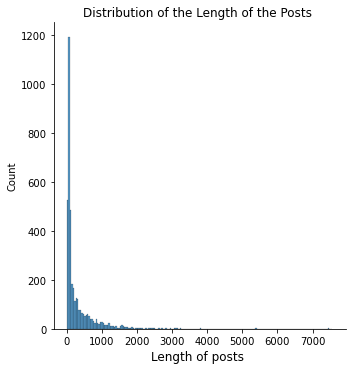

In [20]:
plt.figure(figsize= (16,9))

sns.displot(data=df_comb, x='all_text_length',height=5,aspect=1)

plt.title("Distribution of the Length of the Posts ")

plt.xlabel("Length of posts ", fontsize = 12) ;

*Interpetation*: with this graph we can see that the general distribution of the length of the post is skewed to the right which show that most of the post are under 2000 characters.

C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


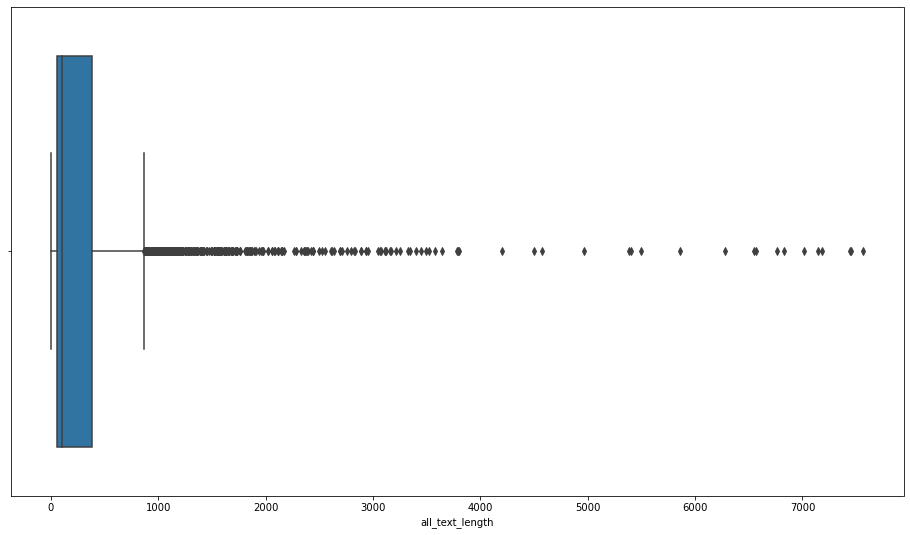

In [21]:
plt.figure(figsize=(16,9))

sns.boxplot(df_comb['all_text_length']);

<Figure size 1152x648 with 0 Axes>

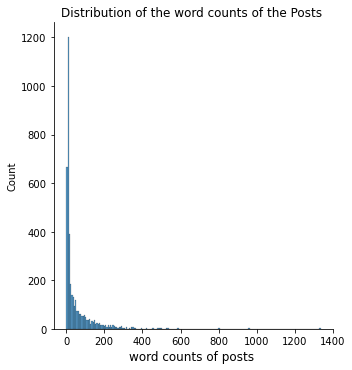

In [22]:
plt.figure(figsize=(16,9))

sns.displot(df_comb['all_text_word_count'])

plt.title("Distribution of the word counts of the Posts ")

plt.xlabel("word counts of posts ", fontsize = 12);

*Interpetation*: with this graph we can see that the general distribution of the word count of the post is skewed to the right which show that most of the post are under 200 words.

In [23]:
plt.figure(figsize=(16,9))

sns.boxplot(df_comb, x='all_text_word_count');

C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

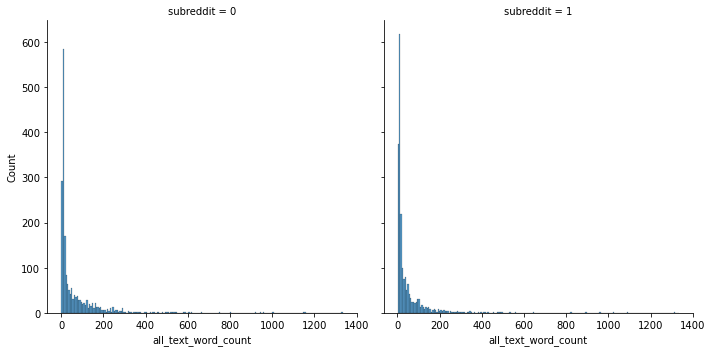

In [24]:
#distribution of word count according separate by subreddit
plt.figure(figsize=(16,9))
sns.displot(df_comb, x='all_text_word_count', col='subreddit')



*Interpetation*: with this graph we can see that the general distribution of the word count of the posts from the urban planning subreddit and sustainability subreddit are almost the same which show that most of the post are under 200 words.

C:\Users\irene\anaconda3\envs\dsirfx_py38\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

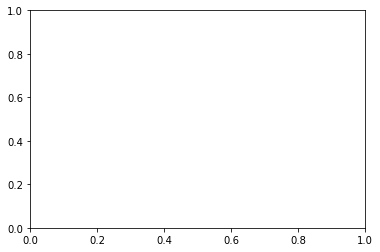

In [22]:
plt.hist(df_comb.groupby('subreddit')['all_text_word_count'])



In [25]:
df_comb.groupby('subreddit').describe()

all_text_length                                                     \
                    count        mean         std   min    25%    50%    75%   
subreddit                                                                      
0                  1967.0  398.837316  698.890332  11.0  62.00  111.0  479.5   
1                  2040.0  296.422059  555.160534   4.0  57.75   96.0  301.0   

                  all_text_word_count                                          \
              max               count       mean         std  min   25%   50%   
subreddit                                                                       
0          7563.0              1967.0  65.365531  114.861485  1.0  10.0  18.0   
1          7146.0              2040.0  46.521078   86.880297  1.0   9.0  15.0   

                         
            75%     max  
subreddit                
0          78.0  1335.0  
1          48.0  1313.0

In [26]:
# removing the link in the all_text column 

df_comb['all_text']= df_comb['all_text'].apply(lambda x: re.sub('http\S+\s*', '', str(x)))

### PRE- PROCESSING

the next step we are going to use the CountVectorizer to analyze the data

## Using the CountVectorizer method 

In [27]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer(stop_words='english')

In [28]:
df_comb.isnull().sum()

subreddit              0
title                  0
selftext               0
all_text               0
all_text_length        0
all_text_word_count    0
dtype: int64

In [35]:
df_comb = df_comb.dropna()

In [36]:
df_comb.isnull().sum()

subreddit              0
title                  0
selftext               0
all_text               0
all_text_length        0
all_text_word_count    0
dtype: int64

In [29]:
#using only a countvectorizer in EDA  

df_su= df_comb['all_text']



In [30]:
# Fit the vectorizer on our corpus.
# Transform the corpus.
df_cvec = cvec.fit_transform(df_su)

In [ ]:
df_cvec.todense()

In [31]:
# Make a dataframe
# Convert data to dense representation
# Use CountVectorizer's .get_feature_names() to label the columns
df_cv= pd.DataFrame(df_cvec.todense(), columns = cvec.get_feature_names())
df_cv.head()

,00,000,0001,0020,004,006,01,02,023,03,...,zurich,zwolle,zyberk,благоустройство,𝗛𝘂𝗺𝗮𝗻,𝗦𝗲𝗮,𝗧𝘂𝗿𝘁𝗹𝗲,𝗰𝗼𝗻𝘀𝗲𝗿𝘃𝗮𝘁𝗶𝗼𝗻,𝗽𝗼𝗮𝗰𝗵𝗶𝗻𝗴,𝙧𝙚𝙘𝙮𝙘𝙡𝙖𝙗𝙡𝙚𝙨
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_cvec.shape

(4007, 14064)

<AxesSubplot:>

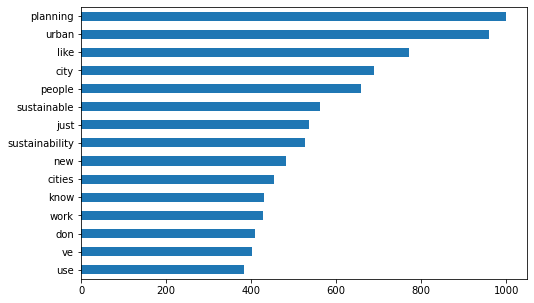

In [33]:
plt.figure(figsize=(8,5))

df_cv.sum().sort_values(ascending=False).head(15).sort_values(ascending=True).plot(kind="barh")

*Interpetation*: With this we see that the most used word  is planning followed by urban 

In [34]:
df_cv.sum().sort_values(ascending=False).head(15).sort_values(ascending=False)

planning          1000
urban              960
like               771
city               689
people             658
sustainable        561
just               536
sustainability     526
new                481
cities             453
know               430
work               429
don                409
ve                 403
use                383
dtype: int64

In [35]:
cvec2 = CountVectorizer(stop_words='english',ngram_range=(2,2))

In [36]:
df_cvec2 = cvec2.fit_transform(df_su)

<AxesSubplot:>

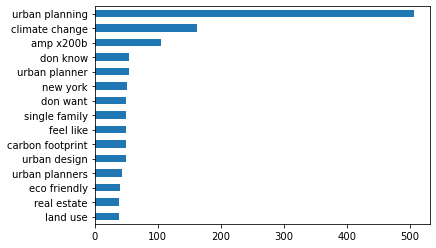

In [37]:
# convert training data to dataframe
df_cvec2 = pd.DataFrame(cvec2.fit_transform(df_su).todense(),
                           columns=cvec2.get_feature_names())

# plot top occuring words
df_cvec2.sum().sort_values(ascending=False).head(15).sort_values(ascending=True).plot(kind='barh')

## Using the TfidVectorizer

In [38]:
# Instantiate the transformer.
tvec = TfidfVectorizer(stop_words='english')

<AxesSubplot:>

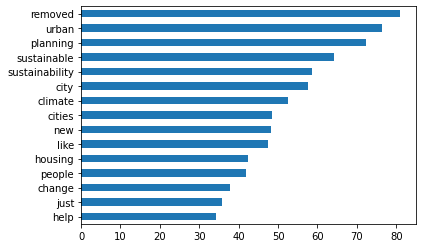

In [39]:
# convert training data to dataframe
df_tfidf = pd.DataFrame(tvec.fit_transform(df_su).todense(),
                           columns=tvec.get_feature_names())

# plot top occuring words
df_tfidf.sum().sort_values(ascending=False).head(15).sort_values(ascending=True).plot(kind='barh')

In [40]:
df_tfidf.sum().sort_values(ascending=False).head(15).sort_values(ascending=False)

removed           80.931313
urban             76.334226
planning          72.356623
sustainable       64.307240
sustainability    58.644995
city              57.682329
climate           52.472571
cities            48.542298
new               48.083018
like              47.532237
housing           42.306212
people            41.963658
change            37.788091
just              35.667514
help              34.304554
dtype: float64

In [41]:
# Instantiate the transformer.
tvec1 = TfidfVectorizer(stop_words='english',ngram_range=(2,2))

<AxesSubplot:>

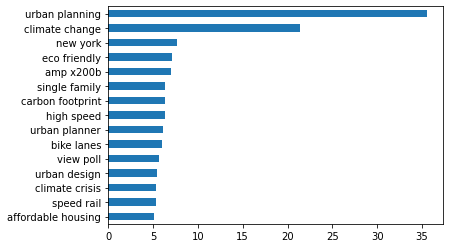

In [42]:
# convert training data to dataframe
df1_tfidf = pd.DataFrame(tvec1.fit_transform(df_su).todense(),
                           columns=tvec1.get_feature_names())

# plot top occuring words
df1_tfidf.sum().sort_values(ascending=False).head(15).sort_values(ascending=True).plot(kind='barh')

In [43]:
df1_tfidf.sum().sort_values(ascending=False).head(15).sort_values(ascending=False)

urban planning        35.541879
climate change        21.415241
new york               7.730194
eco friendly           7.176414
amp x200b              6.991361
single family          6.385449
carbon footprint       6.374030
high speed             6.316101
urban planner          6.108178
bike lanes             5.997717
view poll              5.636209
urban design           5.439843
climate crisis         5.381282
speed rail             5.294901
affordable housing     5.174385
dtype: float64

In [44]:
df_cv = df_cv.drop(['subreddit'] ,axis=1)

In [ ]:
#look at the most used world according on the categories
#sentiment analysis
#look of others visualization I can do
#use the n_gram to better understand 

Create a new DataFrames that combines the subreddit and the count-vectorized posts.

In [45]:
subreddit = df_comb['subreddit']

In [46]:
frames= [df_cv,subreddit]
class_and_text = pd.concat(frames,axis=1)
class_and_text.head()

,00,000,0001,0020,004,006,01,02,023,03,...,zwolle,zyberk,благоустройство,𝗛𝘂𝗺𝗮𝗻,𝗦𝗲𝗮,𝗧𝘂𝗿𝘁𝗹𝗲,𝗰𝗼𝗻𝘀𝗲𝗿𝘃𝗮𝘁𝗶𝗼𝗻,𝗽𝗼𝗮𝗰𝗵𝗶𝗻𝗴,𝙧𝙚𝙘𝙮𝙘𝙡𝙖𝙗𝙡𝙚𝙨,subreddit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
class_and_text['subreddit'].value_counts()    

1.0    2040
0.0    1967
Name: subreddit, dtype: int64

In [48]:
class_and_text.isnull().sum()

00              78
000             78
0001            78
0020            78
004             78
                ..
𝗧𝘂𝗿𝘁𝗹𝗲          78
𝗰𝗼𝗻𝘀𝗲𝗿𝘃𝗮𝘁𝗶𝗼𝗻    78
𝗽𝗼𝗮𝗰𝗵𝗶𝗻𝗴        78
𝙧𝙚𝙘𝙮𝙘𝙡𝙖𝙗𝙡𝙚𝙨     78
subreddit       78
Length: 14064, dtype: int64

In [49]:
class_and_text = class_and_text.dropna()

In [218]:
class_and_text.columns

Index(['00', '000', '0001', '0020', '004', '006', '01', '02', '023', '031',
       ...
       '𝘰𝘧', '𝘰𝘧𝘵𝘦𝘯', '𝘱𝘰𝘴𝘪𝘵𝘪𝘷𝘦', '𝘴𝘵𝘳𝘪𝘧𝘦', '𝘵𝘩𝘢𝘵', '𝘵𝘰𝘶𝘤𝘩', '𝘶𝘯𝘤𝘦𝘳𝘵𝘢𝘪𝘯𝘵𝘺',
       '𝘷𝘪𝘢', '𝙧𝙚𝙘𝙮𝙘𝙡𝙖𝙗𝙡𝙚𝙨', 'subreddit'],
      dtype='object', length=14227)

In [60]:
class_and_text.isnull().sum()

00             0
000            0
0001           0
0020           0
004            0
              ..
𝘵𝘰𝘶𝘤𝘩          0
𝘶𝘯𝘤𝘦𝘳𝘵𝘢𝘪𝘯𝘵𝘺    0
𝘷𝘪𝘢            0
𝙧𝙚𝙘𝙮𝙘𝙡𝙖𝙗𝙡𝙚𝙨    0
subreddit      0
Length: 14227, dtype: int64

In [50]:
class_and_text.shape

(3929, 14064)

In [51]:
class_and_text.loc[(class_and_text['subreddit']== 1),[]].sum().sort_values(ascending=False).head(25)


Series([], dtype: float64)

<AxesSubplot:>

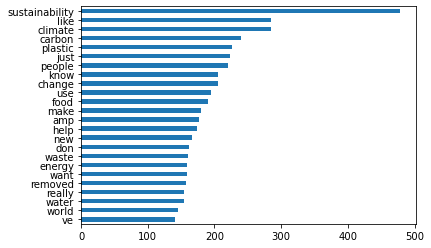

In [61]:
class_and_text[class_and_text['subreddit']== 1].sum().sort_values(ascending=False)[2:26].sort_values(ascending=True).plot(kind='barh')

In [53]:
class_and_text[class_and_text['subreddit']== 0].sum().sort_values(ascending=False).head(25)

planning       965.0
urban          928.0
city           634.0
like           471.0
people         425.0
cities         419.0
just           302.0
housing        298.0
work           290.0
new            289.0
ve             256.0
public         243.0
don            242.0
think          225.0
know           219.0
job            205.0
want           200.0
development    195.0
car            184.0
time           184.0
use            182.0
experience     176.0
looking        171.0
make           169.0
good           168.0
dtype: float64

<AxesSubplot:>

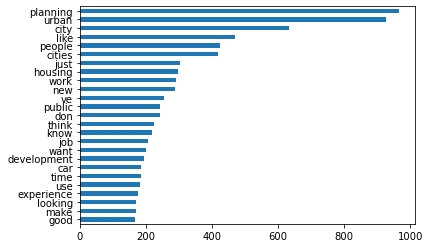

In [54]:
class_and_text[class_and_text['subreddit']== 0].sum().sort_values(ascending=False).head(25).sort_values(ascending=True).plot(kind='barh')

In [57]:
frames= [df1_tfidf,subreddit]
class_and_text1 = pd.concat(frames,axis=1)
class_and_text1 = class_and_text1.dropna()
class_and_text1.head()


,00 00,00 19,00 20,00 50,00 59,00 evening,00 fare,00 nn,00 pm,00 train,...,zwolle nl,zyberk speck,благоустройство blagoustoistvo,𝗛𝘂𝗺𝗮𝗻 𝗦𝗲𝗮,𝗦𝗲𝗮 𝗧𝘂𝗿𝘁𝗹𝗲,𝗧𝘂𝗿𝘁𝗹𝗲 relationship,𝗰𝗼𝗻𝘀𝗲𝗿𝘃𝗮𝘁𝗶𝗼𝗻 𝗛𝘂𝗺𝗮𝗻,𝗽𝗼𝗮𝗰𝗵𝗶𝗻𝗴 turn,𝙧𝙚𝙘𝙮𝙘𝙡𝙖𝙗𝙡𝙚𝙨 recycling,subreddit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

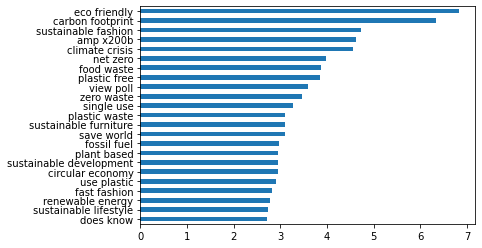

In [63]:
class_and_text1[class_and_text1['subreddit']== 1].sum().sort_values(ascending=False)[2:25].sort_values(ascending=True).plot(kind='barh')

In [60]:
class_and_text1[class_and_text1['subreddit']==1].sum().sort_values(ascending=False).head(25)

subreddit                  1962.000000
climate change               17.156805
eco friendly                  6.834048
carbon footprint              6.327442
sustainable fashion           4.724656
amp x200b                     4.614974
climate crisis                4.555204
net zero                      3.980755
food waste                    3.878754
plastic free                  3.843990
view poll                     3.598705
zero waste                    3.456110
single use                    3.275816
plastic waste                 3.106320
sustainable furniture         3.097836
save world                    3.097481
fossil fuel                   2.978754
plant based                   2.957055
sustainable development       2.955082
circular economy              2.937797
use plastic                   2.896205
fast fashion                  2.814185
renewable energy              2.772771
sustainable lifestyle         2.723527
does know                     2.715005
dtype: float64

<AxesSubplot:>

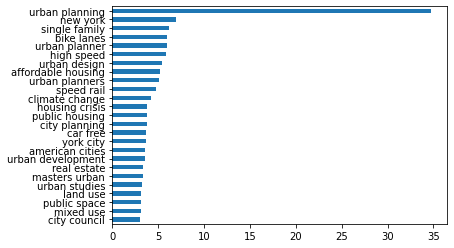

In [59]:
class_and_text1[class_and_text1['subreddit']== 0].sum().sort_values(ascending=False).head(25).sort_values(ascending=True).plot(kind='barh')

## Modeling

In this part we are going to use   

In [101]:
# Defininfg the X and y 
X = df_comb['all_text']
y = df_comb['subreddit']
X.head()

0    Beautiful Frozen Chicago Filmed With Drone | 4...
1    What are some jobs outside the realm of urban ...
2    Do you think US governments investing in socia...
3           TOP-DOWN and BOTTOM-UP urban development. 
4    One of the best urban designs probably in the ...
Name: all_text, dtype: object

In [102]:
# Redefine training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [103]:
X_train.shape

(2682,)

In [104]:
y_train.shape

(2682,)

In [105]:
X.shape

(4004,)

In [106]:
y.shape

(4004,)

In [107]:
 #guessing the majority class every time
y_test.value_counts(normalize=True)

1    0.509834
0    0.490166
Name: subreddit, dtype: float64

## Multinomial Naives Bayes Model

The first model we are going to use is the Multinomial Naive Bayes 

In [260]:
# Let's set a pipeline up with two stages:
# 1. CountVectorizer (transformer)
# 2. Multinomial Naive Bayes (estimator)

pipe_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('mnb',MultinomialNB())
])

In [261]:
cross_val_score(pipe_tfidf, X_train, y_train, cv=5).mean()

0.910891770199283

In [262]:
#Fit the model
#Trainning score
#test score

pipe_tfidf.fit(X_train, y_train)
print(pipe_tfidf.score(X_train, y_train))
print(pipe_tfidf.score(X_test, y_test))

0.9791200596569725
0.903177004538578


In [108]:
# Let's set a pipeline up with two stages:
# 1. CountVectorizer (transformer)
# 2. Multinomial Naive Bayes (estimator)

pipe = Pipeline([
    ('covec', CountVectorizer()),
    ('mnb',MultinomialNB())
])

In [71]:
from sklearn.model_selection import cross_val_score

In [109]:
# Estimate how your model will perform on unseen data
cross_val_score(pipe, X_train, y_train, cv=5).mean()

0.9101434169932461

In [110]:
#Fit the model
#Trainning score
#test score

pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.9679343773303505
0.903177004538578


With this score we can see that this model is overfitting 

In [ ]:
X_train.shape

In [111]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000, 5000
# Minimum number of documents needed to include token: 2, 3
# Maximum number of documents needed to include token: 90%, 95%
# Check individual tokens and also check  2-grams.

param_grid = {
    'covec__max_features': [2000, 3000, 4000, 5000],
    'covec__min_df': [2,3],
    'covec__max_df': [.90, .95],
    'covec__ngram_range': [(1,1), (2,2)]
    
}

In [116]:
# Instantiate GridSearchCV.
mnb_gs = GridSearchCV(pipe, param_grid, cv=5, verbose=1)

In [117]:
mnb_gs.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('covec', CountVectorizer()),
                                       ('mnb', MultinomialNB())]),
             param_grid={'covec__max_df': [0.9, 0.95],
                         'covec__max_features': [2000, 3000, 4000, 5000],
                         'covec__min_df': [2, 3],
                         'covec__ngram_range': [(1, 1), (2, 2)]},
             verbose=1)

In [118]:
print(mnb_gs.best_score_)

0.9135009310986965


In [115]:
mnb_gs.best_params_

{'covec__max_df': 0.9,
 'covec__max_features': 4000,
 'covec__min_df': 3,
 'covec__ngram_range': (1, 1)}

In [119]:
# Score model on training set.

mnb_gs.score(X_train, y_train)

0.9448173005219985

In [120]:
# Score model on testing set.
mnb_gs.score(X_test, y_test)

0.9024205748865356

In [121]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [122]:
# Get predictions
preds = mnb_gs.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()


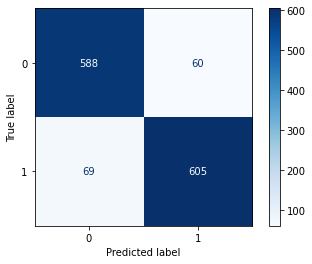

In [124]:
# View confusion matrix

plot_confusion_matrix(mnb_gs, X_test, y_test, cmap="Blues", values_format="d");

In [125]:
 # Calculate the specificity TRUE NEG RATE
spec = tn / (tn + fp)

spec

0.9074074074074074

In [126]:
sens = tp / (tp + fn)
sens

0.8976261127596439

In [127]:
from sklearn.metrics import classification_report, recall_score, precision_score

In [128]:
classification_report(y_test, preds, digits=4, output_dict=True)

{'0': {'precision': 0.8949771689497716,
  'recall': 0.9074074074074074,
  'f1-score': 0.9011494252873563,
  'support': 648},
 '1': {'precision': 0.9097744360902256,
  'recall': 0.8976261127596439,
  'f1-score': 0.9036594473487678,
  'support': 674},
 'accuracy': 0.9024205748865356,
 'macro avg': {'precision': 0.9023758025199986,
  'recall': 0.9025167600835257,
  'f1-score': 0.9024044363180621,
  'support': 1322},
 'weighted avg': {'precision': 0.9025213127112436,
  'recall': 0.9024205748865356,
  'f1-score': 0.902429118834551,
  'support': 1322}}

In [ ]:
#interpreting the score

In [259]:
print (f'Precision: {precision_score(y_test,preds, zero_division = 0)}')
print (f'Sensitivity: {recall_score(y_test,preds)}')
print (f'Specificity: {recall_score(y_test,preds,pos_label = 0)}')

Precision: 0.8506224066390041
Sensitivity: 0.9124629080118695
Specificity: 0.8333333333333334


Text(0.5, 0.98, 'Sustainability Predictions as % of Predicted Class')

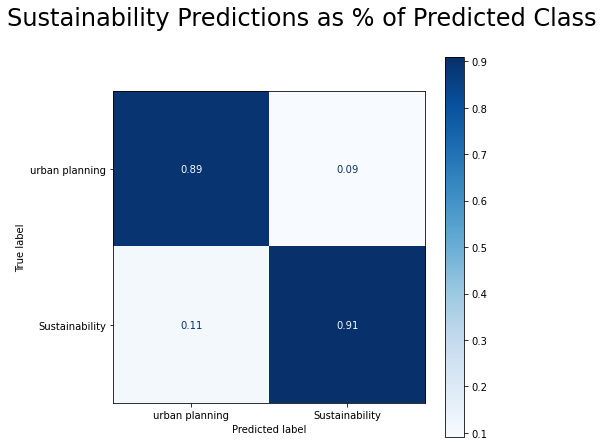

In [265]:
# View confusion matrix
display_labels = ['urban planning', 'Sustainability']

fig, ax = plt.subplots(figsize=(7, 7))

plot_confusion_matrix(mnb_gs,
                      X_test,
                      y_test,
                      cmap="Blues",
                      normalize='pred',
                      display_labels=display_labels,
                     ax=ax);
plt.suptitle("Sustainability Predictions as % of Predicted Class", fontsize=24)

Text(0.5, 0.98, 'sustainability Predictions as % of True Class')

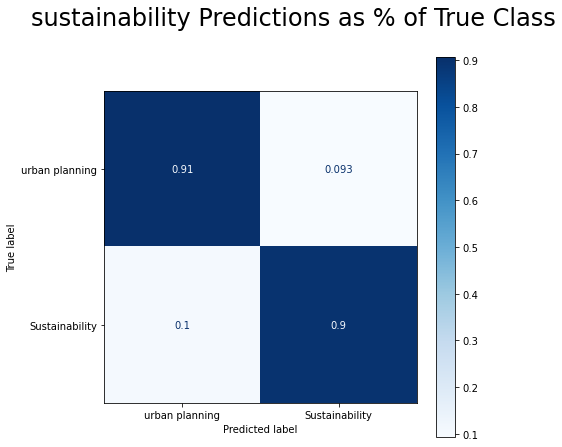

In [266]:
# View confusion matrix
display_labels = ['urban planning', 'Sustainability']

fig, ax = plt.subplots(figsize=(7, 7))

plot_confusion_matrix(mnb_gs,
                      X_test,
                      y_test,
                      cmap="Blues",
                      normalize='true',
                      display_labels=display_labels,
                     ax=ax);
plt.suptitle("sustainability Predictions as % of True Class", fontsize=24)

## Using  Random forest classifiers

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
#Instantiate the RandomForestClassifier
rf = RandomForestClassifier()

In [147]:
# Let's set a pipeline up with two stages:
# 1. CountVectorizer (transformer)
# 2. RandomForestClassifier (estimator)

rf_pipe = Pipeline([
    ('covec', CountVectorizer()),
    ('rf',RandomForestClassifier())
])

In [148]:
# Estimate how your model will perform on unseen data
cross_val_score(rf_pipe, X_train, y_train, cv=5).mean()

0.8769594763612109

In [150]:
#Fit the model
#Trainning score
#test score

rf_pipe.fit(X_train, y_train)
print(rf_pipe.score(X_train, y_train))
print(rf_pipe.score(X_test, y_test))

0.9996271439224459
0.875945537065053


In [176]:
rf_params = {
    'rf__n_estimators': [100, 150],
    'rf__max_depth': [None, 1, 2,],
    'covec__max_features': [2000, 3000, 4000],
    'covec__min_df': [2,3],
    'covec__max_df': [.90, .95],
    'covec__ngram_range': [(1,1), (2,2)]
}

In [177]:
rf_gs = GridSearchCV(rf_pipe, param_grid=rf_params, cv=5, verbose=1)

In [159]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [178]:
rf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('covec', CountVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'covec__max_df': [0.9, 0.95],
                         'covec__max_features': [2000, 3000, 4000],
                         'covec__min_df': [2, 3],
                         'covec__ngram_range': [(1, 1), (2, 2)],
                         'rf__max_depth': [None, 1, 2],
                         'rf__n_estimators': [100, 150]},
             verbose=1)

In [179]:
print(rf_gs.best_score_)

0.8788251480030016


In [180]:
rf_gs.best_params_

{'covec__max_df': 0.95,
 'covec__max_features': 2000,
 'covec__min_df': 2,
 'covec__ngram_range': (1, 1),
 'rf__max_depth': None,
 'rf__n_estimators': 100}

In [181]:
rf_gs.score(X_train, y_train)

0.9977628635346756

In [182]:
rf_gs.score(X_test, y_test)

0.8736762481089259

In [185]:
# Get predictions
preds_rf = rf_gs.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_rf).ravel()

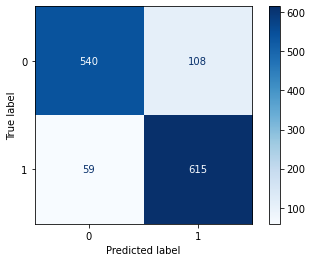

In [186]:
# View confusion matrix

plot_confusion_matrix(rf_gs, X_test, y_test, cmap="Blues", values_format="d");

In [187]:
classification_report(y_test, preds_rf, digits=4, output_dict=True)

{'0': {'precision': 0.9015025041736227,
  'recall': 0.8333333333333334,
  'f1-score': 0.8660785886126704,
  'support': 648},
 '1': {'precision': 0.8506224066390041,
  'recall': 0.9124629080118695,
  'f1-score': 0.8804581245526127,
  'support': 674},
 'accuracy': 0.8736762481089259,
 'macro avg': {'precision': 0.8760624554063134,
  'recall': 0.8728981206726014,
  'f1-score': 0.8732683565826416,
  'support': 1322},
 'weighted avg': {'precision': 0.8755621216181515,
  'recall': 0.8736762481089259,
  'f1-score': 0.8734097589784201,
  'support': 1322}}

In [ ]:
#interpreting the score

In [258]:
print (f'Precision: {precision_score(y_test,preds_rf, zero_division = 0)}')
print (f'Sensitivity: {recall_score(y_test,preds_rf)}')
print (f'Specificity: {recall_score(y_test,preds_rf,pos_label = 0)}')

Precision: 0.8506224066390041
Sensitivity: 0.9124629080118695
Specificity: 0.8333333333333334


## Using KNN 

In [188]:
from sklearn.neighbors import KNeighborsClassifier

In [190]:
# Let's set a pipeline up with two stages:
# 1. CountVectorizer (transformer)
# 2. KNeighborsClassifier (estimator)

knn_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knn',KNeighborsClassifier())
])

In [191]:
# Estimate how your model will perform on unseen data
cross_val_score(knn_pipe, X_train, y_train, cv=5).mean()

0.8326002668223129

In [192]:
#Fit the model
#Trainning score
#test score

knn_pipe.fit(X_train, y_train)
print(knn_pipe.score(X_train, y_train))
print(knn_pipe.score(X_test, y_test))

0.9299030574198359
0.8260211800302572


In [263]:
# Get predictions
preds_knn = knn_pipe.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_knn).ravel()

In [264]:
print (f'Precision: {precision_score(y_test,preds_knn, zero_division = 0)}')
print (f'Sensitivity: {recall_score(y_test,preds_knn)}')
print (f'Specificity: {recall_score(y_test,preds_knn,pos_label = 0)}')

Precision: 0.8501577287066246
Sensitivity: 0.7997032640949555
Specificity: 0.8533950617283951


In [64]:
# View confusion matrix

plot_confusion_matrix(knn_pipe, X_test, y_test, cmap="Blues", values_format="d");

NameError: name 'plot_confusion_matrix' is not defined

### Conclusion

My recommendation for the urban planners are to incorporate more elements regarding climate change , waste management and energy  and  and also non-motorized mode of transportation such as bike lanes.
The best model to use also in this case will be Multinomial Naives Bayes model because even though it doesn’t have a highest accuracy score the f-1 score is high which is the mean between precision and recall.